In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
n = 20
k1 = 20
k2 = 20
d = 0.00006
dx = 1000/n
dy = 1000/n
dt = 20
lam = 0.75

U = np.zeros((25, n, n))
b = np.zeros(n)
f = np.zeros((n, n))

f[int(n/2)][int(300/dy)] = 0.8 

for i in range(n): 
    for j in range(n):
        if i == 0 or i == n-1 or j == 0 or j == n-1:
            U[0][i][j] = 100 
        else:
            U[0][i][j] = 100 

In [3]:
def b(U1, k, i, j):
        return dt*lam*(k1*(U1[k][i+1][j] - 2*U1[k][i][j] + U1[k][i-1][j])/(dx**2) + k2*(U1[k][i][j+1] - 2*U1[k][i][j] + U1[k][i][j-1])/(dy**2)) + f[i][j] + U1[k][i][j] 

def get_vect_B(k):
    vect_B = np.zeros(n**2)
    U1 = np.zeros((n, n))
    for i in range(1, n-1):
        for j in range(1, n - 1):
            U1[i][j] = b(U, k, i, j)
    U1 = np.reshape(U1, (n**2, 1))
    for i in range(len(vect_B)):
            if i<= n-1 or i>= len(vect_B) - n or i % n == 0 or (i+1) % n == 0:
                vect_B[i] = 0
            else:
                vect_B[i] = U1[i]
    return vect_B

def U_k(k):
    U1 = np.zeros((n, n))
    res = np.linalg.solve(matr_A, get_vect_B(k))
    res = np.reshape(res,(n, n))
    for i in range(n):
        for j in range(n):
            U1[i][j] = res[i][j]
    return U1


In [4]:
matr_A = np.zeros((n**2, n**2))

m = len(matr_A)

for i in range(m):
    for j in range(m):
        if i <= n-1:
            if i == j:
                matr_A[i][j] = 1
                matr_A[i][j+n] = -1
        elif i >= m - n:
            if i == j:
                matr_A[i][j] = 1
                matr_A[i][j-n] = -1 
        elif j % n == 0:
            if i == j:
                matr_A[i][j] = 1
                matr_A[i][j+1] = -1 
        elif (j+1) % n == 0:
            if i == j:
                matr_A[i][j] = 1
                matr_A[i][j-1] = -1
        else:
            if i == j:
                matr_A[i][j] = 1 - dt*(1-lam)*(-2*k1/(dx**2) - 2*k2/(dy**2))
                matr_A[i][j-n] = -dt*(1-lam)*k1/(dx**2)
                matr_A[i][j+n] = -dt*(1-lam)*k1/(dx**2)
                matr_A[i][j-1] = -dt*(1-lam)*k2/(dy**2)
                matr_A[i][j+1] = -dt*(1-lam)*k2/(dy**2)

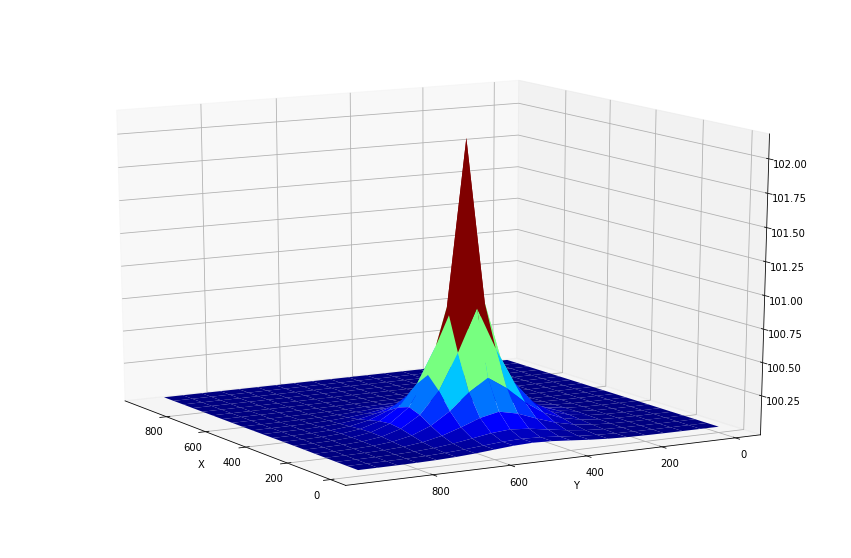

In [5]:
for k in range(1, 25):
    U[k] = U_k(k-1)
    
    
fig = plt.figure(figsize=[15, 10])
ax = fig.gca(projection='3d')
ax.view_init(15, 150)
X = np.arange(0, n*dx, dx)
Y = np.arange(0, n*dy, dy)
X, Y = np.meshgrid(X, Y)
ax.plot_surface(X, Y, U[24], cmap = 'jet')
# ax.scatter(X, Y, U[24], cmap = 'jet')
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()
